# Linear Regression

The first part of this notebook will perform linear regression on univariate (single dimensional) training data using gradient descent. 

The second part will then use our linear regression model on more complex, multi-dimensional data, and then finally we'll perform linear regression using the normal equation method to compare the results of both.

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

---
## Part 1 - Linear Regression with one variable

Linear regression will be used to make basic predictions on the profits for a food truck 

In [3]:
datafile = np.loadtxt('machine-learning-ex1/ex1/ex1data1.txt', delimiter=',')

print("The shape of the data is: {}".format(datafile.shape))

X = datafile[:, 0]
y = datafile[:, 1]
m = X.shape[0]

np.reshape(X, (len(X), ))

print(X.shape)

The shape of the data is: (97, 2)
(97,)


### Visualise the data

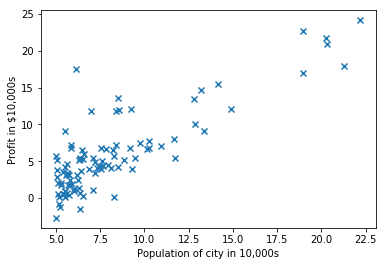

In [4]:
plt.scatter(X, y, marker='x')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.show()

In [5]:
# add a column of 1's to the training data for the bias unit
bias = np.ones((m, 1))
X = np.column_stack((bias, X))

In [6]:
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [7]:
random_gen = np.random.RandomState(1)
theta = random_gen.normal(loc = 0.0, scale = 0.01, size =(X.shape[1],))

alpha = 0.01
iterations = 1500

### Linear Regression Cost Function

For linear regression, our goal is to minimise a cost function through optimisation of our model parameters, $ \theta $. The basic cost function we'll be using is as follows:

$ J(\theta) = \displaystyle\frac{1}{2m} \displaystyle\sum_{i=1}^{m} \Big(h_{\theta}(x^{(i)}) - y^{(i)} \Big)^2 $

Where for one-dimensional data, the hypothesis, $ h_{\theta}(x) $, is a linear model given by:

$ h_{\theta}(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1} $

In [8]:
def cost(X, y, theta):
    total = 0
    for xi, target in zip(X, y):
        sq_error = (hypothesis(xi, theta) - target)**2
        total += sq_error
    cost = float(total) / (2*len(y))
    return cost
    
def hypothesis(xi, theta):
    return np.dot(xi, theta)

In [9]:
print(cost(X, y, theta))

32.3783839234


This cost very closely approximates the figures expected by the Octave results in the Andrew Ng Coursera exercise. Success!

### Applying gradient descent

We'll be performing batch gradient descent in order to minimise our cost function and optimise our parameters, $ \theta $. This means we simultaneously update all of our parameters using gradient descent on the entire training dataset.

To perform gradient descent, we need to determine the derivative of the cost function, and update the original parameters at a rate chosen by our learning rate (commonly referred to as alpha).

For each training iteration, we perform the following update on each parameter, $ \theta_{j} $:

$ \theta_{j} := \theta_{j} - \alpha \displaystyle\frac{1}{m} \displaystyle\sum_{i=1}^{m} \Big((h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)} \Big) $

The aim is to bring our parameters, $ \theta $, to more optimal values after each iteration of training. This in turn will lead to an optimal cost, $ J(\theta) $.

In [10]:
def gradient_descent(X, y, theta, alpha, iterations):
    J_history = []
    m = float(len(y))
    weights = theta[:]
    for iteration in range(iterations):
        hx = np.dot(X, weights)
        errors = hx - y
        weights -= (alpha/m) * X.T.dot(errors)
        cost = ((errors**2).sum()) / (2*m)
        J_history.append(cost)
    return J_history, weights

In [11]:
costs = []
costs, weights = gradient_descent(X, y, theta, alpha=0.01, iterations=1000)

print("Weights found by gradient descent: {0}".format(weights))

print("\nExpected weights from Andrew Ng's R model: [-3.6303 1.1664]")

Weights found by gradient descent: [-3.238655    1.12701822]

Expected weights from Andrew Ng's R model: [-3.6303 1.1664]


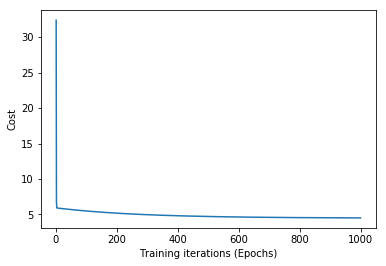

In [12]:
plt.figure()
plt.plot(range(1, len(costs) + 1), costs)
plt.ylabel("Cost")
plt.xlabel("Training iterations (Epochs)")
plt.show()

Success! The cost appears to correctly decrease with increasing training iterations.

### Visualise the linear model fit on our original training data:

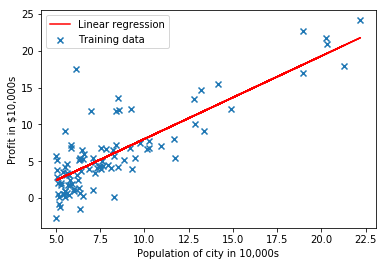

In [13]:
plt.figure()
plt.scatter(X[:, 1], y, marker='x')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.plot(X[:, 1], (X*weights)[:, 1] + (X*weights)[:, 0], c='r')
plt.legend(["Linear regression", "Training data"])
plt.show()

### We can also make some predictions for profits using our linear regression model:

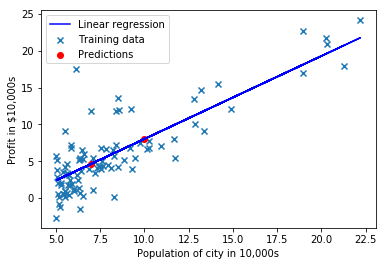

In [14]:
# make predictions for population sizes 70,000 and 100,000 
populations = np.array([[1, 7.0], [1, 10.0]])
predictions = populations * weights

# plot original plus new predictions
plt.figure()
plt.scatter(X[:, 1], y, marker='x')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.plot(X[:, 1], (X*weights)[:, 1] + (X*weights)[:, 0], c='b')
plt.scatter(populations[:, 1], predictions[:, 1] + predictions[:, 0], c='r', marker='o')
plt.legend(["Linear regression", "Training data", "Predictions"])
plt.show()

As can be seen, the predicted points are shown precisely on the linear regression line.

### Testing of the models on the second dataset - multivariate linear regression

In [120]:
datafile = np.loadtxt('machine-learning-ex1/ex1/ex1data2.txt', delimiter=',')

print("The shape of the data is: {}".format(datafile.shape))

X = datafile[:, :2]
y = datafile[:, 2]
m = X.shape[0]

The shape of the data is: (47, 3)


### Basic visualisation of our data in 3D

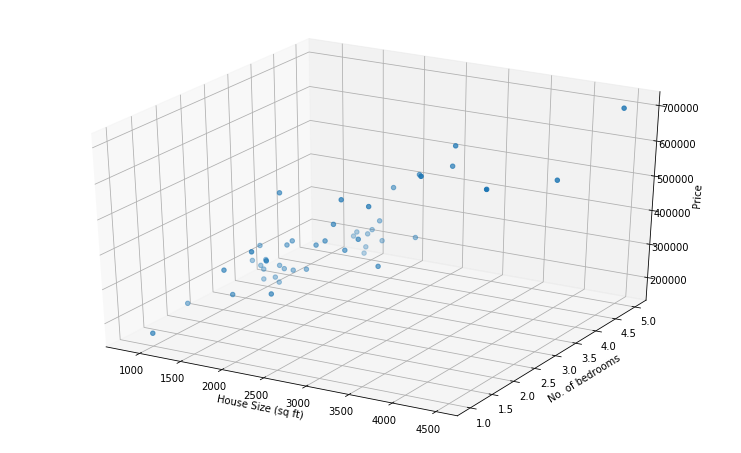

In [121]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (10, 6)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel("House Size (sq ft)")
ax.set_ylabel("No. of bedrooms")
ax.set_zlabel("Price")
plt.show()

In [122]:
print(X[:5])
print(y[:5])
print(np.mean(X, axis=0))

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
[399900. 329900. 369000. 232000. 539900.]
[2000.68085106    3.17021277]


In [123]:
def feature_normalise(X):
    X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis = 0)
    return X_norm

In [124]:
X_std = feature_normalise(X)

In [125]:
# add a column of 1's to the training data for the bias unit
bias = np.ones((m, 1))
X_std = np.column_stack((bias, X_std))

random_gen = np.random.RandomState(1)
theta = random_gen.normal(loc = 0.0, scale = 0.01, size =(X_std.shape[1],))

In [126]:
costs, weights = gradient_descent(X_std, y, theta, alpha=0.01, iterations=1500)

print("Weights found by gradient descent: {0}".format(weights))

Weights found by gradient descent: [340412.5630144  109370.0567041   -6500.61509451]


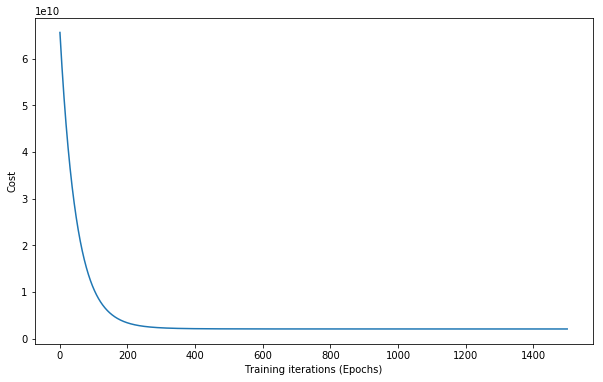

In [127]:
plt.figure()
plt.plot(range(1, len(costs) + 1), costs)
plt.ylabel("Cost")
plt.xlabel("Training iterations (Epochs)")
plt.show()

Looks good! Our cost function, $ J(\theta) $, is seen to become progressively smaller with successive training iterations, and eventually reaches an optimal value at which point no further decrease is seen.

--- 
# Normal equation method

We can optimise our parameters, $ \theta $, using the normal equation method, like so:

$ \theta = \Big(X^{T}X \Big)^{-1}X^{T}y $

This method has the advantage of not requiring any standardisation or normalisation of data beforehand, unlike with gradient descent. It's disadvantage is that it can become very computationally expensive with high-dimensional data.

Although no scaling is required for this method, we still need to add a column of 1's as a bias term.

In [130]:
datafile = np.loadtxt('machine-learning-ex1/ex1/ex1data1.txt', delimiter=',')

print("The shape of the data is: {}".format(datafile.shape))

X = datafile[:, 0]
y = datafile[:, 1]
m = X.shape[0]

# add a column of 1's to the training data for the bias unit
bias = np.ones((m, 1))
X = np.column_stack((bias, X))

The shape of the data is: (97, 2)


In [131]:
def normal_equation(X, y):
    inner_prod = np.dot(X.T, X) 
    prod_inv = np.linalg.inv(inner_prod)
    prod = np.dot(prod_inv, X.T)
    theta = np.dot(prod, y)
    return theta

In [132]:
theta = normal_equation(X, y)

print("Weights found by normal equation: {0}".format(theta))

print("\nExpected weights from Andrew Ng's R model: [-3.6303 1.1664]")

Weights found by normal equation: [-3.89578088  1.19303364]

Expected weights from Andrew Ng's R model: [-3.6303 1.1664]


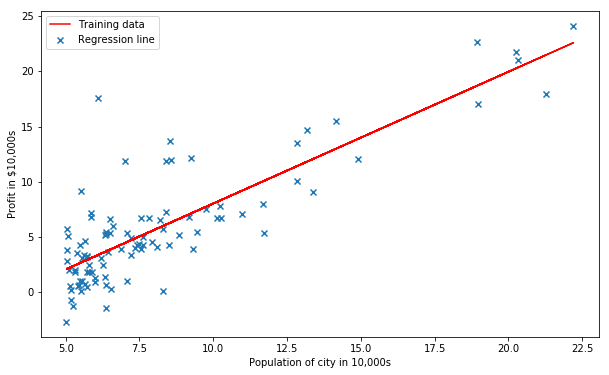

In [133]:
plt.scatter(X[:, 1], y, marker='x')
plt.plot(X[:, 1], (X*theta)[:, 1] + (X*theta)[:, 0], c='r')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.legend(["Training data", "Regression line"])
plt.show()

As we can see, this line precisely matches that from the previous linear regression obtained using gradient descent.